## Train Model: Selecting Model and Dataset

### Preparation and Data Loading

In [12]:
import pandas as pd
import pickle
%pylab inline

dat_to_train, short, long = pickle.load(open('dat_to_train.pkl', 'rb'))

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### First Training

First training is used to compare different algorithms and data sets (metrics/absolute counts or normalized by visit). Additionally, models with different number of estimators are trained.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import classification_report
from datetime import datetime

# Classifier
from sklearn.ensemble import RandomForestClassifier
# n_estimators
from sklearn.ensemble import ExtraTreesClassifier
# n_estimators, complexity of learners, e.g. through max_depth
from sklearn.ensemble import AdaBoostClassifier
# n_estimators, complexity of learners, e.g. through max_depth
from sklearn.ensemble import GradientBoostingClassifier
# n_estimators, complexity of learners, e.g. through max_depth

# make scorer
prec_scorer = make_scorer(precision_score, pos_label ='gekuendigt')
recall_scorer = make_scorer(recall_score, pos_label ='gekuendigt')


In [15]:
# data is stored in dict 'dat_to_train'

# dict of classifiers to test
all_classifier = {
    '_randomForest': RandomForestClassifier,
    '_extraTree': ExtraTreesClassifier,
    '_AdaBoost': AdaBoostClassifier,
    '_GradientBoost': GradientBoostingClassifier 
}

# array of parmater to improve model, in this case n_estimators
param = np.arange(10,130,10)

# tables to store results of training

num_of_datsets = len(list(dat_to_train.keys()))
precis = {}
recall = {}
for key in all_classifier:
    precis[key] = np.zeros((len(param), num_of_datsets))
    recall[key] = np.zeros((len(param), num_of_datsets))


In [204]:
# train all data
for clf_key in all_classifier:
    print(datetime.now().time())
    print(clf_key)
    
    for dat_key, dat in dat_to_train.items():
        
        print(dat_key)
        dat_idx = list(dat_to_train.keys()).index(dat_key)     
        
        # separate label and data 
        label = dat['Kuendigungsstatus']
        dat_cp = dat.drop(columns = 'Kuendigungsstatus').copy()
        
        # split data into training, validation and test set
        dat_trainval, dat_test, label_trainval, label_test = train_test_split(dat_cp, label, test_size=0.2,
                                                                              random_state=42)
        
        for param_idx in range(len(param)):
            
            # initialize classifier with certain parameter
            clf = all_classifier[clf_key](n_estimators = param[param_idx] )
            
           
            # train model, store precision and recall from average of 10x-cross-validation
            precis[clf_key][param_idx, dat_idx] = mean(cross_val_score(clf, dat_trainval, label_trainval, 
                                                                       cv=10, scoring=prec_scorer))
            recall[clf_key][param_idx, dat_idx] = mean(cross_val_score(clf, dat_trainval, label_trainval, 
                                                                       cv=10, scoring=recall_scorer))
            
print(datetime.now().time())

11:09:04.613934
_randomForest
dat_abs_gauss_final
dat_abs_median_final
dat_abs_allMetric_final
dat_per_v_gauss_final
dat_per_v_median_final
dat_per_v_allMetric_final
dat_abs_per_v_gauss_final
dat_abs_per_v_median_final
dat_abs_per_v_allMetric_final
11:35:27.410094
_extraTree
dat_abs_gauss_final
dat_abs_median_final
dat_abs_allMetric_final
dat_per_v_gauss_final
dat_per_v_median_final
dat_per_v_allMetric_final
dat_abs_per_v_gauss_final
dat_abs_per_v_median_final
dat_abs_per_v_allMetric_final
11:50:08.390647
_AdaBoost
dat_abs_gauss_final
dat_abs_median_final
dat_abs_allMetric_final
dat_per_v_gauss_final
dat_per_v_median_final
dat_per_v_allMetric_final
dat_abs_per_v_gauss_final
dat_abs_per_v_median_final
dat_abs_per_v_allMetric_final
12:50:18.244871
_GradientBoost
dat_abs_gauss_final
dat_abs_median_final
dat_abs_allMetric_final
dat_per_v_gauss_final
dat_per_v_median_final
dat_per_v_allMetric_final
dat_abs_per_v_gauss_final
dat_abs_per_v_median_final
dat_abs_per_v_allMetric_final
13:38:11.8

In [205]:
# save scoring results from cross validation
import pickle
pickle.dump( (precis, recall), open( "scoring_crossVal.pkl", "wb" ) )

### Plot

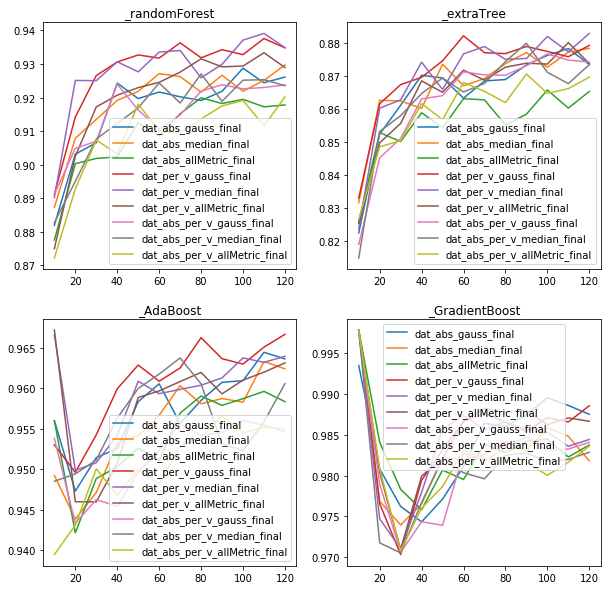

In [206]:
labels = ['dat_abs_gauss_final','dat_abs_median_final','dat_abs_allMetric_final',
          'dat_per_v_gauss_final','dat_per_v_median_final','dat_per_v_allMetric_final',
          'dat_abs_per_v_gauss_final','dat_abs_per_v_median_final','dat_abs_per_v_allMetric_final']

param = np.arange(10,130,10)

fig, axs = plt.subplots(2,2, figsize=(10,10))
for key, dat in precis.items():
    key_idx = list(precis.keys()).index(key)
    for datset in range(9):  
        axs[(int(key_idx/2)), key_idx%2].plot(param, dat[:,datset], label=labels[datset])
    # title, leend for each subplot
    axs[(int(key_idx/2)), key_idx%2].legend()
    axs[(int(key_idx/2)), key_idx%2].title.set_text(key)
plt.show()

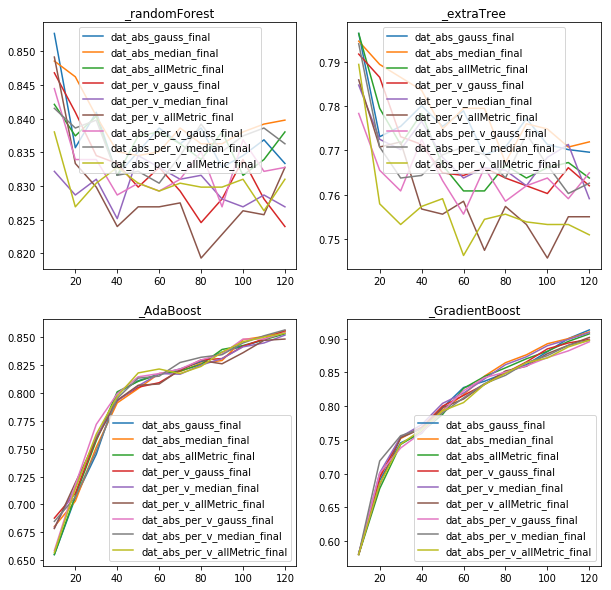

In [207]:
fig, axs = plt.subplots(2,2, figsize=(10,10))
for key, dat in recall.items():
    key_idx = list(recall.keys()).index(key)
    for datset in range(9):  
        axs[(int(key_idx/2)), key_idx%2].plot(param, dat[:,datset], label=labels[datset])
    # title, legend for each subplot
    axs[(int(key_idx/2)), key_idx%2].legend()
    axs[(int(key_idx/2)), key_idx%2].title.set_text(key)
plt.show()

In [174]:
recall.keys()

dict_keys(['_randomForest', '_extraTree', '_AdaBoost', '_GradientBoost'])

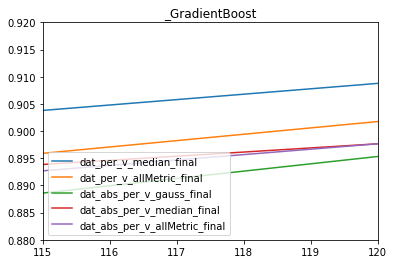

In [209]:
key = '_GradientBoost'
dat = recall[key]

for datset in range(4,9):  
    _ = plt.plot(param, dat[:,datset], label=labels[datset])
plt.xlim((115,120))
plt.ylim((0.88,0.92))
plt.legend(loc='lower left')
_ = plt.title(key)

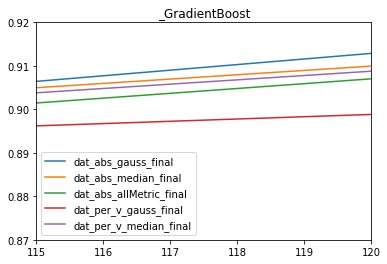

In [213]:
key = '_GradientBoost'
dat = recall[key]

for datset in range(5):  
    _ = plt.plot(param, dat[:,datset], label=labels[datset])
plt.xlim((115,120))
plt.ylim((0.87,0.92))
plt.legend(loc='lower left')
_ = plt.title(key)

Gradient Boost performs best, both accuracy- and recall-wise. The data set which takes all absolute counts and counts per v + rank-based metric into account performs best.  A second training is nececeassry to determine optimal number of estimators. I will use the two best-performing (in matters of recall) data sets 'dat_abs_gauss_final' and 'dat_abs_median_final' for comparison.

### Second Training

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import classification_report
from datetime import datetime

# Classifier
from sklearn.ensemble import GradientBoostingClassifier
# n_estimators, complexity of learners, e.g. through max_depth

# make scorer
prec_scorer = make_scorer(precision_score, pos_label ='gekuendigt')
recall_scorer = make_scorer(recall_score, pos_label ='gekuendigt')


In [236]:
## preparation of variables to call and to store

data_sets = ['dat_abs_gauss_final','dat_abs_median_final']

# array of parmater to improve model, in this case n_estimators
param = np.arange(200,1500,50)

# tables to store results of training

num_of_datsets = 2
precis_2 = {}
recall_2 = {}
for key in all_classifier:
    precis_2[key] = np.zeros((len(param), num_of_datsets))
    recall_2[key] = np.zeros((len(param), num_of_datsets))
    
# train model
   
for dat_key in data_sets:
    print(datetime.now().time())        
    print(dat_key)
    dat_idx = list(dat_to_train.keys()).index(dat_key)  
    
    # get data and separate label and data        
    dat = dat_to_train[dat_key]
    label = dat['Kuendigungsstatus']
    dat_cp = dat.drop(columns = 'Kuendigungsstatus').copy()

    # split data into training, validation and test set
    dat_trainval, dat_test, label_trainval, label_test = train_test_split(dat_cp, label, test_size=0.2,random_state=42)
 
    for param_idx in range(len(param)):
            
        # initialize classifier with certain parameter
        clf = GradientBoostingClassifier(n_estimators = param[param_idx] )

        # store precision and recall from average of 10x-cross-validation
        precis_2[clf_key][param_idx, dat_idx] = mean(cross_val_score(clf, dat_trainval, label_trainval, 
                                                                   cv=10, scoring=prec_scorer))
        recall_2[clf_key][param_idx, dat_idx] = mean(cross_val_score(clf, dat_trainval, label_trainval, 
                                                                   cv=10, scoring=recall_scorer))

    print(datetime.now().time())


10:10:16.346053
dat_abs_gauss_final
11:52:51.344567
11:52:51.344714
dat_abs_median_final
13:17:11.254987


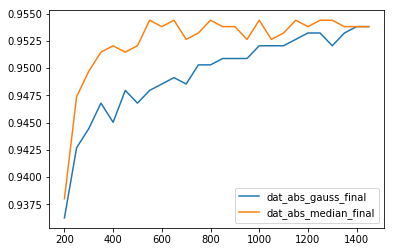

In [238]:
data_sets = ['dat_abs_gauss_final','dat_abs_median_final']

# array of parmater to improve model, in this case n_estimators
param = np.arange(200,1500,50)

for datset in range(2):  
    plt.plot(param, recall_2['_GradientBoost'][:,datset], label=labels[datset])
    # title, legend for each subplot
plt.legend()
plt.show()

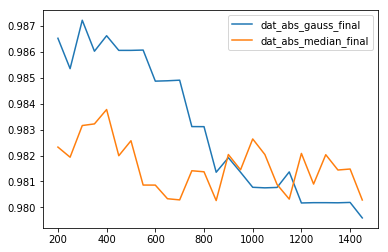

In [239]:
data_sets = ['dat_abs_gauss_final','dat_abs_median_final']

# array of parmater to improve model, in this case n_estimators
param = np.arange(200,1500,50)

for datset in range(2):  
    plt.plot(param, precis_2['_GradientBoost'][:,datset], label=labels[datset])
    # title, legend for each subplot
plt.legend()
plt.show()

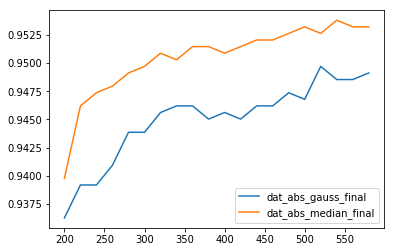

In [235]:
data_sets = ['dat_abs_gauss_final','dat_abs_median_final']

# array of parmater to improve model, in this case n_estimators
param = np.arange(200,600,20)

for datset in range(2):  
    plt.plot(param, recall_2['_GradientBoost'][:,datset], label=labels[datset])
    # title, legend for each subplot
plt.legend()
plt.show()

#### Training without Vertragslaenge

In [240]:
## preparation of variables to call and to store

data_sets = ['dat_abs_gauss_final','dat_abs_median_final']

# array of parmater to improve model, in this case n_estimators
param = np.arange(200,1700,50)

# tables to store results of training

num_of_datsets = 2
precis_wovl = {}
recall_wovl = {}
for key in all_classifier:
    precis_wovl[key] = np.zeros((len(param), num_of_datsets))
    recall_wovl[key] = np.zeros((len(param), num_of_datsets))
    
# train model
   
for dat_key in data_sets:
    print(datetime.now().time())        
    print(dat_key)
    dat_idx = list(dat_to_train.keys()).index(dat_key)  
    
    # get data and separate label and data        
    dat = dat_to_train[dat_key]
    label = dat['Kuendigungsstatus']
    dat_cp = dat.drop(columns = ['Kuendigungsstatus','Vertragslaenge']).copy()

    # split data into training, validation and test set
    dat_trainval, dat_test, label_trainval, label_test = train_test_split(dat_cp, label, test_size=0.2,random_state=42)
 
    for param_idx in range(len(param)):
            
        # initialize classifier with certain parameter
        clf = GradientBoostingClassifier(n_estimators = param[param_idx] )

        # store precision and recall from average of 10x-cross-validation
        precis_wovl[clf_key][param_idx, dat_idx] = mean(cross_val_score(clf, dat_trainval, label_trainval, 
                                                                   cv=10, scoring=prec_scorer))
        recall_wovl[clf_key][param_idx, dat_idx] = mean(cross_val_score(clf, dat_trainval, label_trainval, 
                                                                   cv=10, scoring=recall_scorer))

    print(datetime.now().time())

14:43:06.867383
dat_abs_gauss_final
16:57:01.985592
16:57:01.985671
dat_abs_median_final
11:15:17.697830


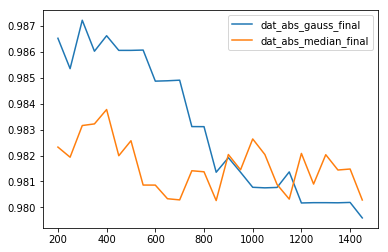

In [241]:
data_sets = ['dat_abs_gauss_final','dat_abs_median_final']

# array of parmater to improve model, in this case n_estimators
param = np.arange(200,1500,50)

for datset in range(2):  
    plt.plot(param, precis_2['_GradientBoost'][:,datset], label=labels[datset])
    # title, legend for each subplot
plt.legend()
plt.show()

### Save Model for Prediction

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle
# n_estimators, complexity of learners, e.g. through max_depth

data = dat_to_train['dat_abs_median_final']

label = data['Kuendigungsstatus']
dat = data.drop(columns='Kuendigungsstatus')

clf = GradientBoostingClassifier(n_estimators=800)
clf.fit(dat,label)

pickle.dump(clf, open('real_prediction/model.pkl','wb'))